In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("data.csv")

df.head()


,Record_ID,Timestamp,Latitude,Longitude,Road_ID,Vehicle_Count,Avg_Speed(km/h),Vehicle_Type,Traffic_Density,Weather,Visibility(m),Road_Condition,Accident_Occurred,Accident_Severity,Alert_Generated,temperature,humidity
0,1,03-10-2023 09:50,32.004714,76.971961,RD-285,419,90,Mixed,Medium,Fog,5663,Under Maintenance,Yes,Major,Yes,31.24,61.12
1,2,09-06-2019 08:01,10.632732,77.828652,RD-384,232,104,Mixed,Very High,Rain,896,Wet,No,-,No,48.52,33.07
2,3,08-01-2020 01:38,12.258165,88.810189,RD-282,339,100,Bus,Medium,Storm,9369,Under Maintenance,No,-,No,41.96,43.97
3,4,18-10-2022 05:43,34.289950,95.415253,RD-128,74,63,Car,Low,Clear,2510,Slippery,Yes,Fatal,No,37.96,59.52
4,5,29-06-2023 23:11,31.698993,77.675486,RD-49,187,73,Mixed,Low,Storm,3447,Wet,No,-,No,24.68,48.61


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record_ID          5500 non-null   int64  
 1   Timestamp          5500 non-null   object 
 2   Latitude           5500 non-null   float64
 3   Longitude          5500 non-null   float64
 4   Road_ID            5500 non-null   object 
 5   Vehicle_Count      5500 non-null   int64  
 6   Avg_Speed(km/h)    5500 non-null   int64  
 7   Vehicle_Type       5500 non-null   object 
 8   Traffic_Density    5500 non-null   object 
 9   Weather            5500 non-null   object 
 10  Visibility(m)      5500 non-null   int64  
 11  Road_Condition     5500 non-null   object 
 12  Accident_Occurred  5500 non-null   object 
 13  Accident_Severity  5500 non-null   object 
 14  Alert_Generated    5500 non-null   object 
 15  temperature        5500 non-null   float64
 16  humidity           5500 

In [5]:
df.describe()


,Record_ID,Latitude,Longitude,Vehicle_Count,Avg_Speed(km/h),Visibility(m),temperature,humidity
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,2750.500000,22.572905,82.476797,254.092364,61.324909,5046.928364,34.903933,59.617035
std,1587.857571,8.356760,8.356606,141.397428,33.207133,2806.171704,8.674031,17.155972
min,1.000000,8.000245,68.007834,10.000000,5.000000,201.000000,20.000000,30.000000
25%,1375.750000,15.480326,75.370574,131.000000,33.000000,2640.000000,27.400000,44.800000
50%,2750.500000,22.616598,82.322999,255.000000,60.000000,5007.000000,34.935000,59.510000
75%,4125.250000,29.930907,89.738211,377.250000,90.000000,7515.000000,42.382500,74.292500
max,5500.000000,36.998251,96.991006,499.000000,119.000000,9998.000000,49.990000,89.980000


In [6]:
df.groupby("Vehicle_Type")["Avg_Speed(km/h)"].mean().sort_values(ascending=False)

df["Accident_Occurred"] = df["Accident_Occurred"].map({
    "Yes": 1,
    "No": 0
})


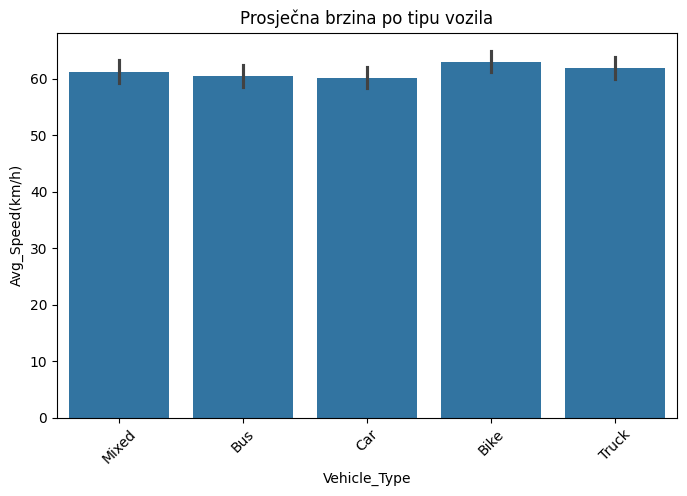

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Vehicle_Type", y="Avg_Speed(km/h)")
plt.title("Prosječna brzina po tipu vozila")
plt.xticks(rotation=45)
plt.show()


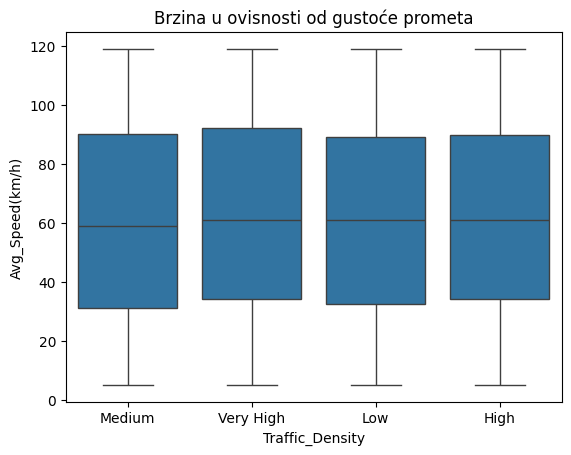

In [8]:
sns.boxplot(data=df, x="Traffic_Density", y="Avg_Speed(km/h)")
plt.title("Brzina u ovisnosti od gustoće prometa")
plt.show()


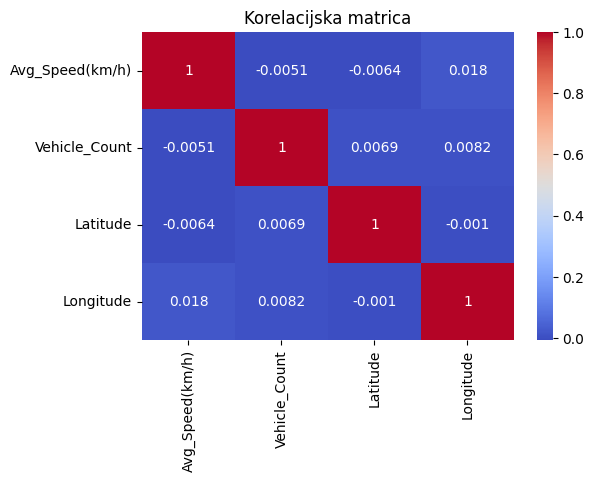

In [9]:
numeric_cols = ["Avg_Speed(km/h)", "Vehicle_Count", "Latitude", "Longitude"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Korelacijska matrica")
plt.show()


In [10]:
original_vehicle_type = df["Vehicle_Type"].copy()

categorical_cols = ["Vehicle_Type", "Traffic_Density", "Weather"]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [11]:
X = df[
    ["Vehicle_Type", "Traffic_Density", "Weather",
     "Avg_Speed(km/h)", "Vehicle_Count", "Latitude", "Longitude"]
]

y = df["Accident_Occurred"] 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
df["Vehicle_Type"] = original_vehicle_type


In [14]:
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [15]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1231
           1       0.00      0.00      0.00       144

    accuracy                           0.90      1375
   macro avg       0.45      0.50      0.47      1375
weighted avg       0.80      0.90      0.85      1375



C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:156

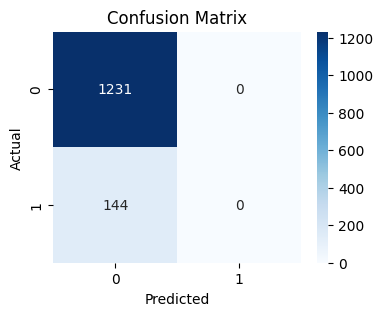

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
importances = model.feature_importances_

feature_importance = pd.Series(
    importances, index=X.columns
).sort_values(ascending=False)

feature_importance


Latitude           0.236016
Longitude          0.210256
Vehicle_Count      0.209529
Avg_Speed(km/h)    0.171147
Vehicle_Type       0.060803
Weather            0.057289
Traffic_Density    0.054959
dtype: float64

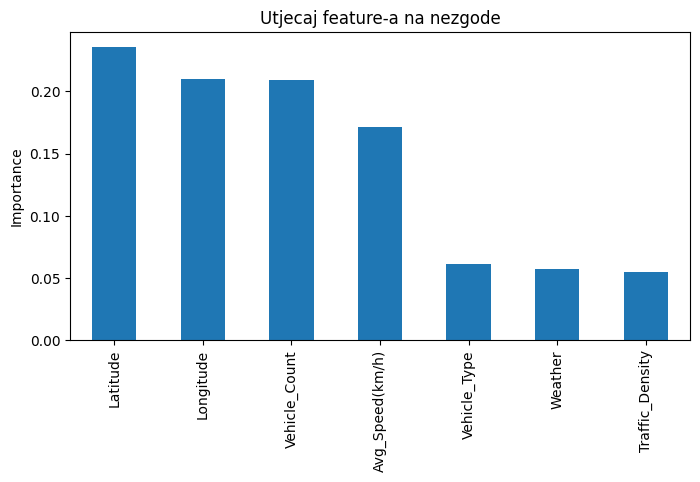

In [18]:
feature_importance.plot(kind="bar", figsize=(8,4))
plt.title("Utjecaj feature-a na nezgode")
plt.ylabel("Importance")
plt.show()


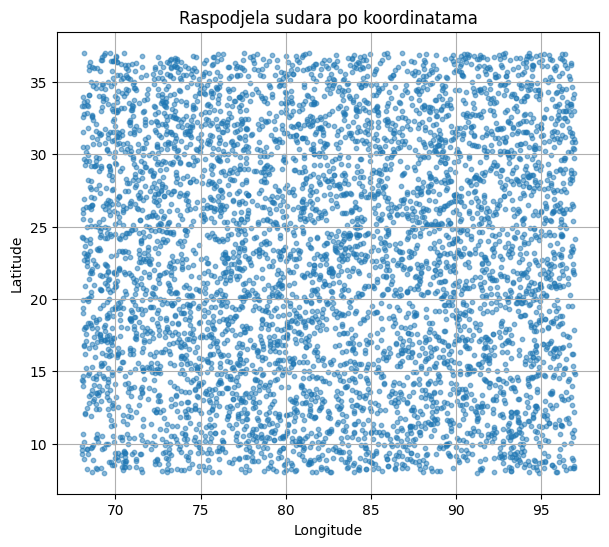

In [19]:
plt.figure(figsize=(7,6))

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    alpha=0.5,
    s=10
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Raspodjela sudara po koordinatama")
plt.grid(True)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_17128\4129380611.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acc_rate = plot_df.groupby("visibility_bin")["Accident_Occurred"].mean()


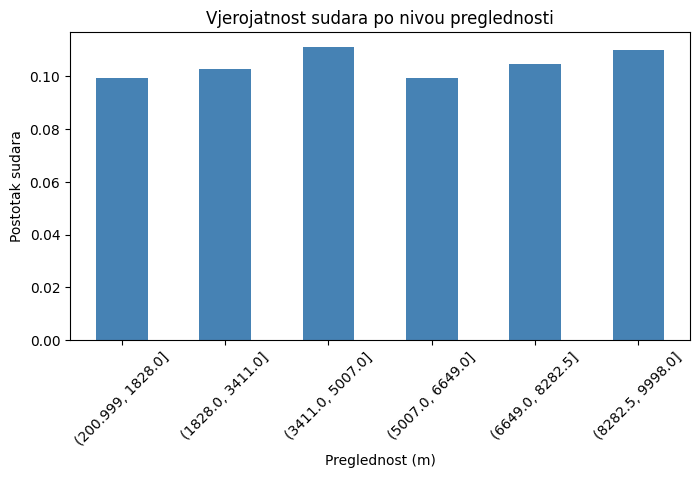

In [20]:
plot_df = df[["Visibility(m)", "Accident_Occurred"]].dropna()
plot_df["visibility_bin"] = pd.qcut(
    plot_df["Visibility(m)"], q=6, duplicates="drop"
)

acc_rate = plot_df.groupby("visibility_bin")["Accident_Occurred"].mean()

acc_rate.plot(kind="bar", figsize=(8,4), color="steelblue")

plt.title("Vjerojatnost sudara po nivou preglednosti")
plt.xlabel("Preglednost (m)")
plt.ylabel("Postotak sudara")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Pretvaranje u numeričke vrednosti
df["Visibility(m)"] = pd.to_numeric(df["Visibility(m)"], errors="coerce")
df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")

df["Accident_Occurred"] = df["Accident_Occurred"].astype(int)

# Zadržavamo samo potrebne kolone
plot_df = df[["Visibility(m)", "temperature", "Accident_Occurred"]].dropna()


In [22]:
plot_df["visibility_level"] = pd.qcut(
    plot_df["Visibility(m)"],
    q=3,
    labels=["Low visibility", "Medium visibility", "High visibility"]
)

plot_df["temperature_level"] = pd.qcut(
    plot_df["temperature"],
    q=3,
    labels=["Cold", "Mild", "Hot"]
)


C:\Users\PC\AppData\Local\Temp\ipykernel_17128\2369976336.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]


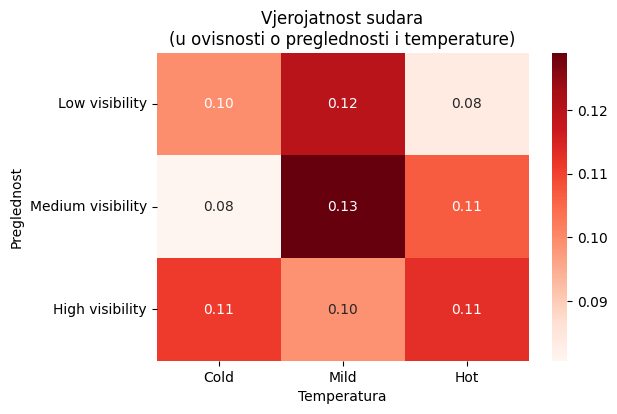

In [23]:
heatmap_data = (
    plot_df
    .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]
    .mean()
    .unstack()
)

plt.figure(figsize=(6,4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.title("Vjerojatnost sudara\n(u ovisnosti o preglednosti i temperature)")
plt.xlabel("Temperatura")
plt.ylabel("Preglednost")
plt.show()


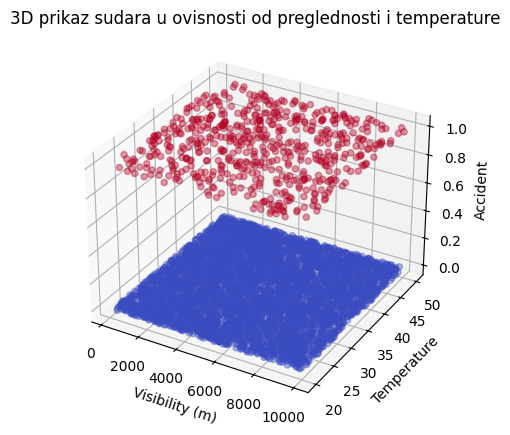

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    plot_df["Visibility(m)"],
    plot_df["temperature"],
    plot_df["Accident_Occurred"],
    c=plot_df["Accident_Occurred"],
    cmap="coolwarm",
    alpha=0.4
)

ax.set_xlabel("Visibility (m)")
ax.set_ylabel("Temperature")
ax.set_zlabel("Accident")
ax.set_title("3D prikaz sudara u ovisnosti od preglednosti i temperature")

plt.show()


In [25]:
# Numeričke konverzije
df["Visibility(m)"] = pd.to_numeric(df["Visibility(m)"], errors="coerce")
df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
df["Accident_Occurred"] = df["Accident_Occurred"].astype(int)

plot_df = df[
    ["Visibility(m)", "temperature", "Traffic_Density", "Accident_Occurred"]
].dropna()


In [26]:
plot_df["visibility_level"] = pd.qcut(
    plot_df["Visibility(m)"],
    q=3,
    labels=["Low", "Medium", "High"]
)

plot_df["temperature_level"] = pd.qcut(
    plot_df["temperature"],
    q=3,
    labels=["Cold", "Mild", "Hot"]
)


C:\Users\PC\AppData\Local\Temp\ipykernel_17128\1458248336.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]


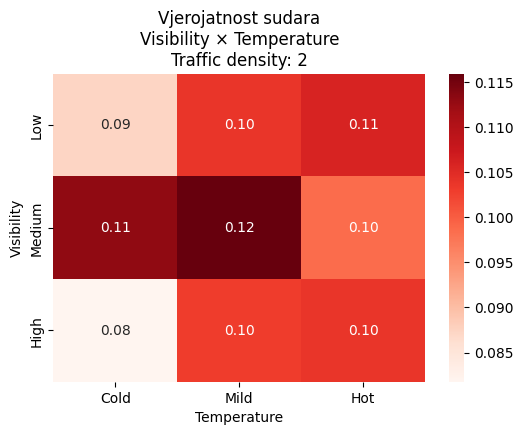

C:\Users\PC\AppData\Local\Temp\ipykernel_17128\1458248336.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]


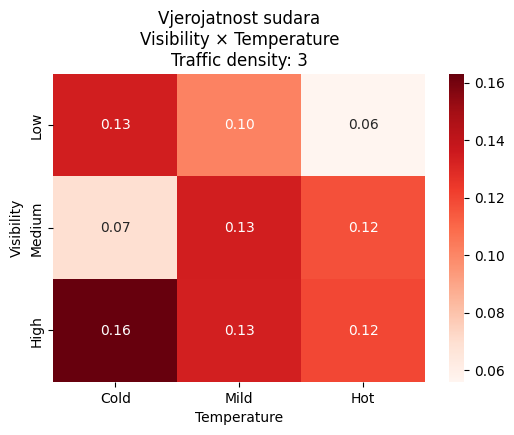

C:\Users\PC\AppData\Local\Temp\ipykernel_17128\1458248336.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]


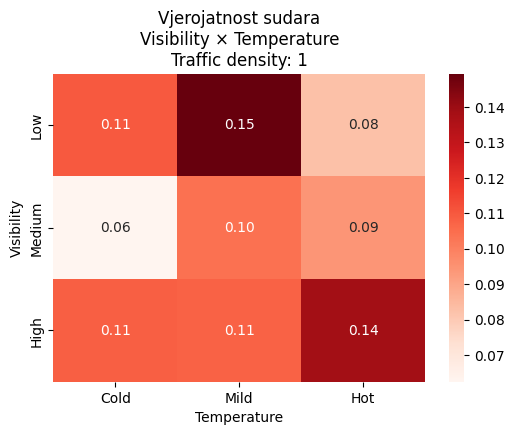

C:\Users\PC\AppData\Local\Temp\ipykernel_17128\1458248336.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]


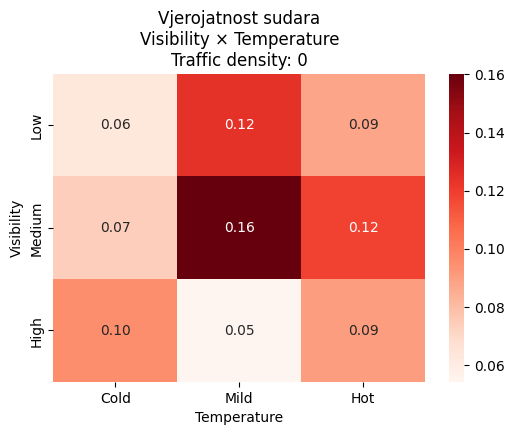

In [27]:
densities = plot_df["Traffic_Density"].unique()

for density in densities:
    subset = plot_df[plot_df["Traffic_Density"] == density]

    heatmap_data = (
        subset
        .groupby(["visibility_level", "temperature_level"])["Accident_Occurred"]
        .mean()
        .unstack()
    )

    plt.figure(figsize=(6,4))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".2f",
        cmap="Reds"
    )

    plt.title(f"Vjerojatnost sudara\nVisibility × Temperature\nTraffic density: {density}")
    plt.xlabel("Temperature")
    plt.ylabel("Visibility")
    plt.show()


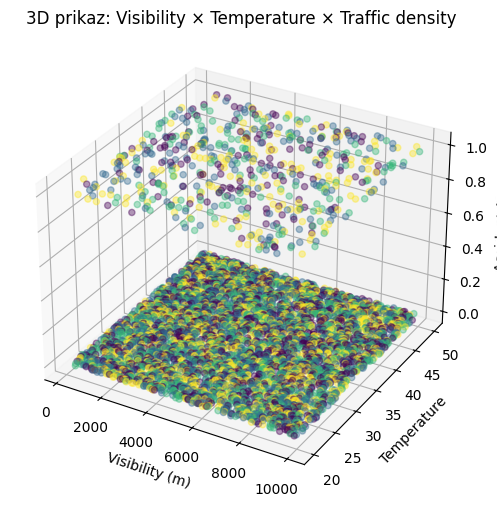

In [28]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    plot_df["Visibility(m)"],
    plot_df["temperature"],
    plot_df["Accident_Occurred"],
    c=plot_df["Traffic_Density"].astype("category").cat.codes,
    cmap="viridis",
    alpha=0.4
)

ax.set_xlabel("Visibility (m)")
ax.set_ylabel("Temperature")
ax.set_zlabel("Accident (0/1)")
ax.set_title("3D prikaz: Visibility × Temperature × Traffic density")

plt.show()


In [29]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df["hour"] = df["Timestamp"].dt.hour
df["date"] = df["Timestamp"].dt.date


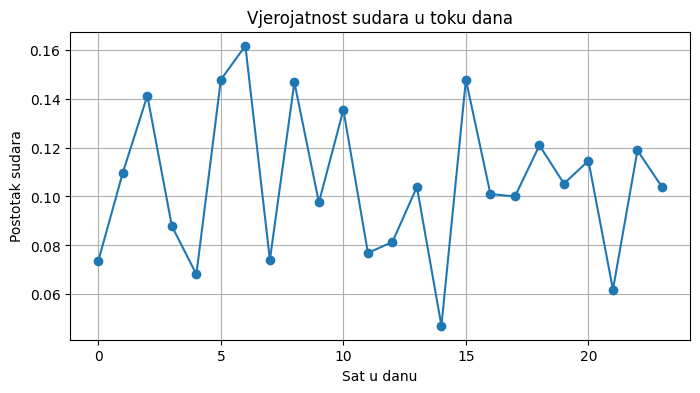

In [30]:
hourly_accidents = (
    df.groupby("hour")["Accident_Occurred"]
    .mean()
)

plt.figure(figsize=(8,4))
hourly_accidents.plot(marker="o")

plt.title("Vjerojatnost sudara u toku dana")
plt.xlabel("Sat u danu")
plt.ylabel("Postotak sudara")
plt.grid(True)
plt.show()


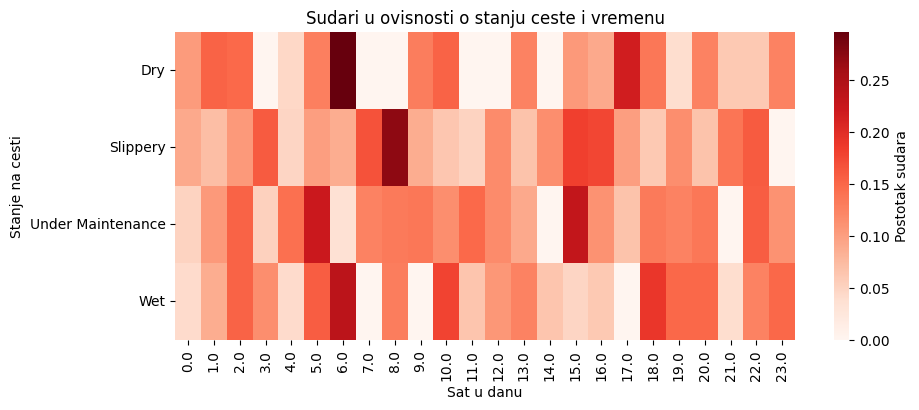

In [31]:
road_time = (
    df.groupby(["Road_Condition", "hour"])["Accident_Occurred"]
    .mean()
    .unstack()
)

plt.figure(figsize=(10,4))
sns.heatmap(
    road_time,
    cmap="Reds",
    cbar_kws={"label": "Postotak sudara"}
)

plt.title("Sudari u ovisnosti o stanju ceste i vremenu")
plt.xlabel("Sat u danu")
plt.ylabel("Stanje na cesti")
plt.show()


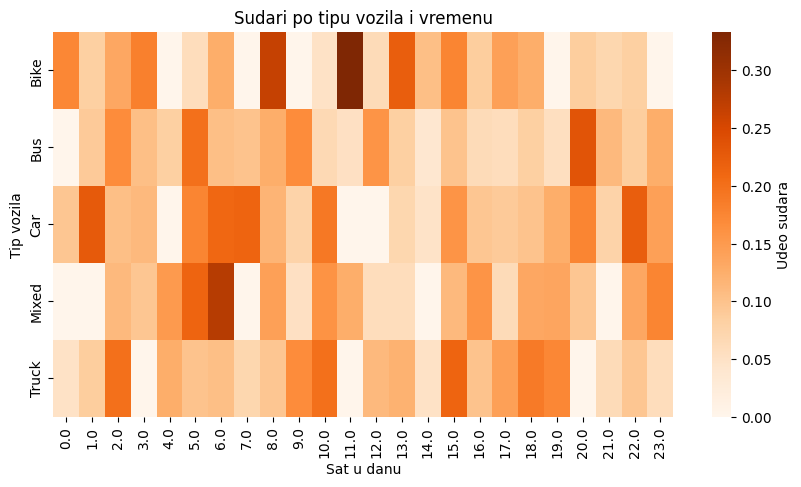

In [32]:
vehicle_time = (
    df.groupby(["Vehicle_Type", "hour"])["Accident_Occurred"]
    .mean()
    .unstack()
)

plt.figure(figsize=(10,5))
sns.heatmap(
    vehicle_time,
    cmap="Oranges",
    cbar_kws={"label": "Udeo sudara"}
)

plt.title("Sudari po tipu vozila i vremenu")
plt.xlabel("Sat u danu")
plt.ylabel("Tip vozila")
plt.show()


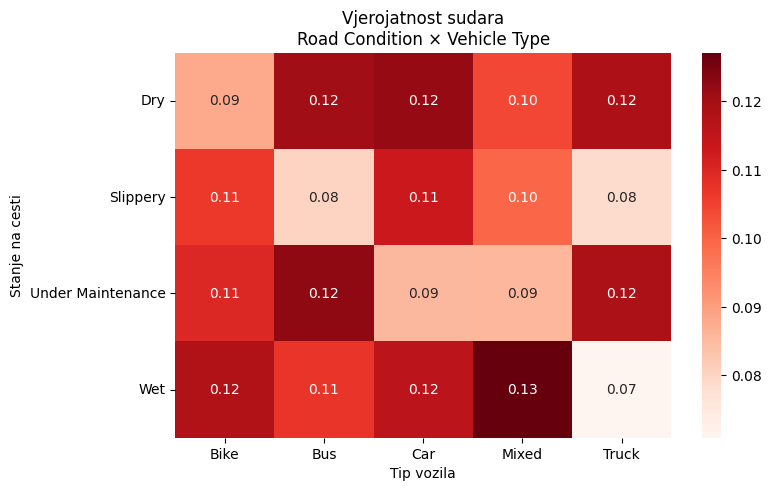

In [33]:
combo = (
    df.groupby(["Road_Condition", "Vehicle_Type"])["Accident_Occurred"]
    .mean()
    .unstack()
)

plt.figure(figsize=(8,5))
sns.heatmap(
    combo,
    annot=True,
    fmt=".2f",
    cmap="Reds"
)

plt.title("Vjerojatnost sudara\nRoad Condition × Vehicle Type")
plt.xlabel("Tip vozila")
plt.ylabel("Stanje na cesti")
plt.show()


In [34]:
# Pretvaramo Timestamp u datetime ako već nije
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Dodajemo kolonu dan u nedelji (0=Monday, 6=Sunday)
df["day_of_week"] = df["Timestamp"].dt.dayofweek

# Za prikaz, možemo dodati imenovani dan
df["day_name"] = df["Timestamp"].dt.day_name()


C:\Users\PC\AppData\Local\Temp\ipykernel_17128\2170423062.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_accidents.index, y=daily_accidents.values, palette="Reds")


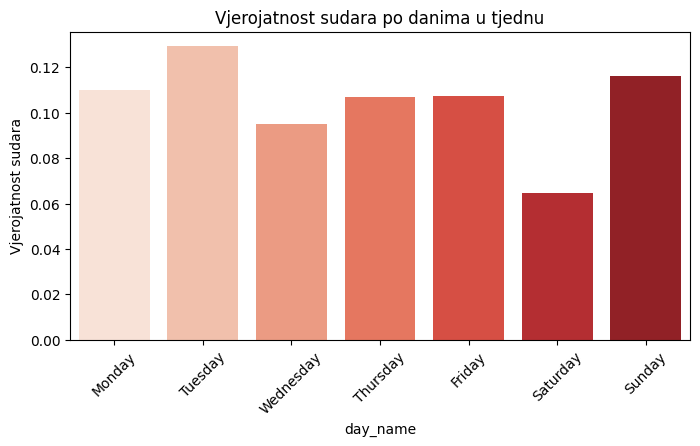

In [35]:
daily_accidents = df.groupby("day_name")["Accident_Occurred"].mean()
daily_accidents = daily_accidents.reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(8,4))
sns.barplot(x=daily_accidents.index, y=daily_accidents.values, palette="Reds")
plt.ylabel("Vjerojatnost sudara")
plt.title("Vjerojatnost sudara po danima u tjednu")
plt.xticks(rotation=45)
plt.show()


In [36]:
# Features koje ćemo koristiti
features = ["Vehicle_Type", "Road_Condition", "Traffic_Density", "Visibility(m)", "temperature", "hour"]

# Dodavanje hour iz Timestamp
df["hour"] = df["Timestamp"].dt.hour

# Drop NaN
ml_df = df[features + ["Accident_Occurred"]].dropna()

# Pretvaranje kategorija u numeričke vrednosti
ml_df = pd.get_dummies(ml_df, columns=["Vehicle_Type", "Road_Condition", "Traffic_Density"], drop_first=True)

X = ml_df.drop("Accident_Occurred", axis=1)
y = ml_df["Accident_Occurred"]


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predikcija
y_pred = model.predict(X_test)

# Evaluacija
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       390
           1       0.00      0.00      0.00        45

    accuracy                           0.90       435
   macro avg       0.45      0.50      0.47       435
weighted avg       0.80      0.90      0.85       435



C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:156

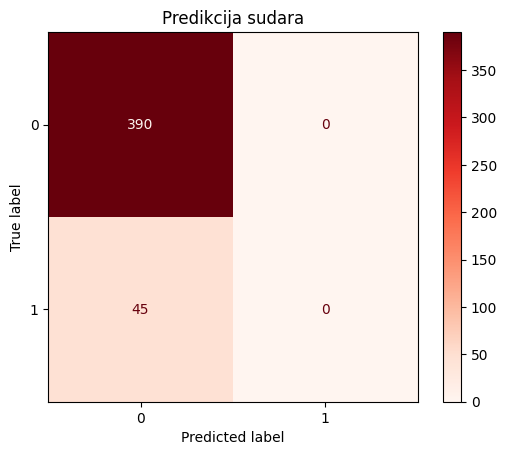

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap="Reds")
plt.title("Predikcija sudara")
plt.show()
